In [16]:
%matplotlib inline

import datacube
from deafrica_tools.plotting import rgb,display_map
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog
import matplotlib as mpl

dc = datacube.Datacube(app="04_Plotting")
#22.559247, 69.019186
#22.348563, 69.784109
#22.150281, 69.873373
# lat_range = (22.247416, 22.626093)
# lon_range = (68.955903, 70.172274)
# la = 22.40
# lo = 69.50
# buf = 0.15
# lat_range = (la-buf, la+buf)
# lon_range = (lo-buf, lo+buf)
# lat_min: 22.57952491712309, lat_max: 23.090848985221374, lng_min: 69.92797851562501, lng_max: 70.57067871093751
# lat_range = (22.20376806142779, 22.554481733875678)
# lon_range = (69.05921488827537, 70.05283866719262)
lat_range = (22.77952491712309, 23.090848985221374)
lon_range = (69.92797851562501, 70.57067871093751)
time_range = ('2019-01-15', '2023-06-26')
#display_map(x=lon_range, y=lat_range)
ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B04_10m","B03_10m","B02_10m", "B08_10m","B05_20m","B11_20m","B12_20m"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-30, 30))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 1, y: 1222, x: 2067)
Coordinates:
  * time         (time) datetime64[ns] 2023-06-04T06:02:49.497270
  * y            (y) float64 2.869e+06 2.869e+06 ... 2.832e+06 2.832e+06
  * x            (x) float64 6.747e+06 6.747e+06 ... 6.809e+06 6.809e+06
    spatial_ref  int32 6933
Data variables:
    B04_10m      (time, y, x) uint16 0 0 0 0 0 0 ... 2922 2450 2256 2511 2912
    B03_10m      (time, y, x) uint16 0 0 0 0 0 0 ... 2469 2097 1959 2114 2462
    B02_10m      (time, y, x) uint16 0 0 0 0 0 0 ... 2090 1797 1684 1845 2108
    B08_10m      (time, y, x) uint16 0 0 0 0 0 0 ... 3606 2813 2628 2875 3257
    B05_20m      (time, y, x) uint16 0 0 0 0 0 0 ... 3171 2616 2472 2898 3197
    B11_20m      (time, y, x) uint16 0 0 0 0 0 0 ... 3942 3269 3145 3512 3746
    B12_20m      (time, y, x) uint16 0 0 0 0 0 0 ... 3475 2939 2842 3159 3344
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


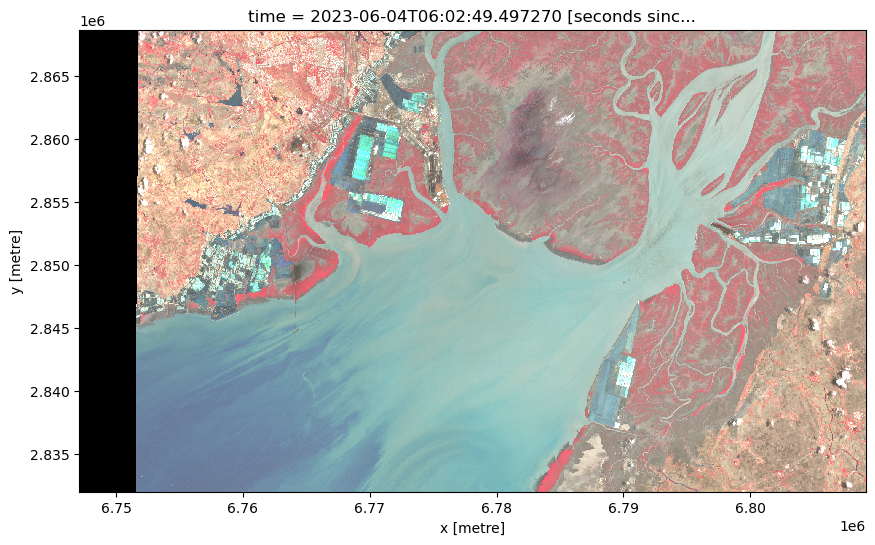

In [10]:
dataset=ds

rgb(ds,bands=['B08_10m','B04_10m','B03_10m'],index=[0,1])

In [3]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(ds)

# Calculate the components that make up the NDVI calculation
band_diff = dataset.B08_10m - dataset.B03_10m
band_sum = dataset.B11_20m - dataset.B03_10m

# Calculate NDVI and store it as a measurement in the original dataset
mvi = band_diff / band_sum
print(mvi)

<xarray.DataArray (time: 1, y: 1222, x: 2067)>
array([[[        nan,         nan,         nan, ...,  3.4411764 ,
         -3.8655462 , -0.8560976 ],
        [        nan,         nan,         nan, ...,  2.163728  ,
         10.361702  , -0.9171271 ],
        [        nan,         nan,         nan, ...,  2.121212  ,
          4.6190476 , -0.9435294 ],
        ...,
        [        nan,         nan,         nan, ...,  0.5427892 ,
          0.6759333 ,  0.6348548 ],
        [        nan,         nan,         nan, ...,  0.53338635,
          0.6218274 ,  0.5722178 ],
        [        nan,         nan,         nan, ...,  0.56408095,
          0.5443491 ,  0.61915886]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2023-06-04T06:02:49.497270
  * y            (y) float64 2.869e+06 2.869e+06 ... 2.832e+06 2.832e+06
  * x            (x) float64 6.747e+06 6.747e+06 ... 6.809e+06 6.809e+06
    spatial_ref  int32 6933


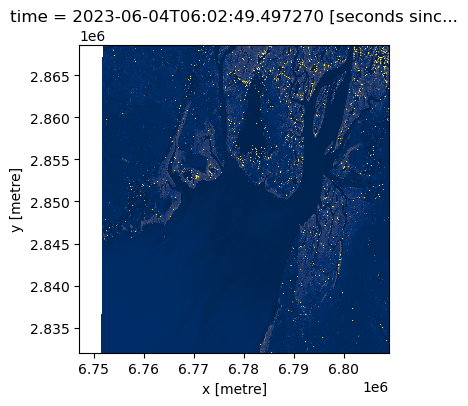

In [4]:
plt.figure(figsize=(4, 4))
mvi.plot(col='time', cmap='cividis', vmin=0 ,vmax=16, add_colorbar=False)
plt.show()

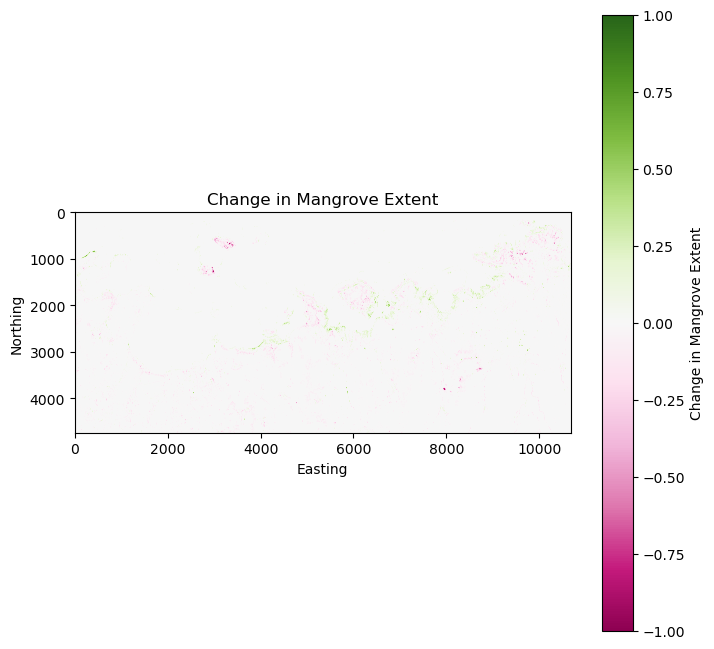

In [5]:
##### import datacube
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Connect to the datacube
dc = datacube.Datacube(app='mangrove_example')

# Define the query parameters
time_range1 = ('2022-01-15', '2022-12-15')
time_range2 = ('2023-01-15', '2023-02-15')

query = {
    'lat': lat_range,
    'lon': lon_range,
    'time': time_range1,
    'measurements': ['B04_10m', 'B03_10m', 'B02_10m', 'B08_10m', 'B11_20m', 'B12_20m'],
    'product': 's2a_sen2cor_granule',
    'output_crs': 'EPSG:32644',
    'resolution': (-10, 10)
}

# Load the data for the first time period
ds1 = dc.load(**query)


# Compute the MVI for the first time period
mangrove1 = ((ds1.B08_10m - ds1.B03_10m) / (ds1.B11_20m - ds1.B03_10m))
# Set threshold for mangrove detection
mangrove_thresh = 10

# Create a mangrove mask
mangrove_mask1 = np.where(mangrove1 > mangrove_thresh, 1, 0)

# Load the data for the second time period
query['time'] = time_range2
ds2 = dc.load(**query)

# Compute the MVI for the second time period
mangrove2 = ((ds2.B08_10m - ds2.B03_10m) / (ds2.B11_20m - ds2.B03_10m))
# Create a mangrove mask
mangrove_mask2 = np.where(mangrove2 > mangrove_thresh, 1, 0)

# Compute the change in mangrove extent
mangrove_change = mangrove_mask2 - mangrove_mask1

# Create a colormap
cmap = plt.get_cmap('PiYG')

# Plot the change in mangrove extent
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(mangrove_change[-1], cmap=cmap, vmin=-1, vmax=1)
ax.set_title('Change in Mangrove Extent')
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Change in Mangrove Extent')

# Show the plot
plt.show()